<a href="https://colab.research.google.com/github/virf96/Chat-Bot/blob/master/DatosFaltantes_SustitucionValorArbitrario_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sustitución por un valor arbitrario con Scikit-learn ==> SimpleImputer 

En la librería Scikit-learn hay una clase para manejar una gran variedad de métodos de sustitución.

El **SimpleImputer** es una clase que provee funcionalidad básica para la sustitución de valores ausentes, incluyendo:

- Sustitución por la media y la mediana para variables numéricas
- Sustitución por la categoría más frecuente para variables categóricas.
- Sustitución por valores arbitrarios para variables numéricas y categóricas.

### Ventajas

- Fácil de usar si se aplica a todo el dataframe
- Código mantenido por desarrolladores de Scikit-learn: buena calidad
- Rápida computación (usa NumPy para los cálculos)
- Permite usar grid-search (búsqueda en cuadrículas) para varios métodos de sustitución
- Permite usar diferentes valores para codificar ausencia de datos (se puede indicar si por ejemplo los valores nulos son np.nan, ceros, cadenas de caracteres vacías, u otros)

### Limitaciones

- Retorna un arreglo de NumPy en lugar de un dataframe de pandas, lo cual es inconveniente para el análisis de datos
- Necesita usar clases adicionales para seleccionar cuales variables se deben sustituir ==>
    - requiere líneas de código adicional
    - requiere ser usado con otras clases
    - no es tan sencillo de usar
    
### Más detalles acerca de los transformadores (transformers en inglés)

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## En este demo:

Vamos a aprender **sustitución por valores arbitrarios con Scikit-learn** usando los datos Ames House Price.

- Para bajar los datos, por favor referirse a la clase de **Datasets** en la  **Sección 1** del curso.

### Nota: 
* 'Imputer' se deriva del verbo en inglés 'to impute' que quiere decir sustituir o reemplazar. Imputer es el objeto que completa la sustitución, de ahí el nombre dado a la clase.
* 'slicing' significa seleccionar conjuntos de datos (columnas/filas) de un ‘DataFrame’.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# estas son las clases para sustitutición con sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# dividir dataset
from sklearn.model_selection import train_test_split

In [2]:
# solo usaremos las siguientes variables en el demo:
# 3 tienen NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# carguemos los datos

data = pd.read_csv('/content/drive/My Drive/datasets/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [5]:
# evaluemos el porcentaje de valores nulos por cada variable
data.isnull().mean().sort_values(ascending=False)

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
SalePrice      0.000000
WoodDeckSF     0.000000
GrLivArea      0.000000
1stFlrSF       0.000000
TotalBsmtSF    0.000000
BsmtUnfSF      0.000000
OverallQual    0.000000
dtype: float64

Las variables LotFrontage, MasVnrArea y GarageYrBlt tienen datos ausentes.

In [6]:
# separar datos en segmentos entrenamiento y prueba

# primero, separemos el target (SalePrice) del resto de las variables (features)
#Separamos los sets porque el imputador solo debe aprender del set de entrenamiento
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # solo las variables
                                                    data['SalePrice'], # el target
                                                    test_size=0.3, # el porcentaje de obs en el segmento de prueba
                                                    random_state=0) # para reproducir
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [7]:
# evaluemos el porcentaje de datos ausentes nuevamente
X_train.isnull().mean().sort_values(ascending=False)

LotFrontage    0.184932
GarageYrBlt    0.052838
MasVnrArea     0.004892
BsmtUnfSF      0.000000
WoodDeckSF     0.000000
GrLivArea      0.000000
1stFlrSF       0.000000
TotalBsmtSF    0.000000
OverallQual    0.000000
dtype: float64

### SimpleImputer en el conjunto de datos

In [8]:
# Ahora sustituyamos los valores faltantes con  SimpleImputer

# creemos una instancia de la clase SimpleImputer
# indicaremos que queremos sustituir con una constante
# en este caso un valor arbitrario de : 999
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)

# ajustamos el imputer al segmento de entrenamiento
# el imputer asigna 999 a todas las variables con valores ausentes
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=999,
              missing_values=nan, strategy='constant', verbose=0)

Para sustituir con valores arbitrario, necesitamos fijar 'strategy' en 'constant' e indicar el valor arbitrario en el paramétro fill_value . 

In [9]:
# podemos ver cual fueron los valores aprendidos asi:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [10]:
# y ahora sustituimos en segmentos de entrenamiento y prueba

# NOTA: los datos se devuelven como un numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [11]:
# transformar los datos nuevamente en un dataframe:
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


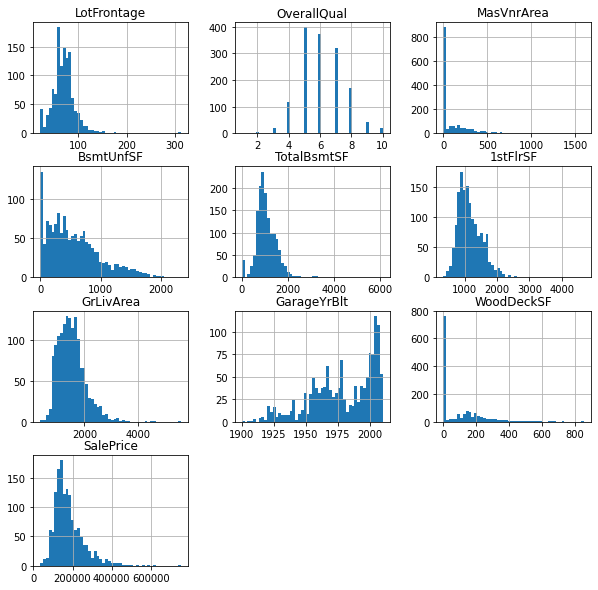

In [13]:
# exploremos las distribuciones de las variables luego de la sustitución
data.hist(bins=50, figsize=(10,10))
plt.show()

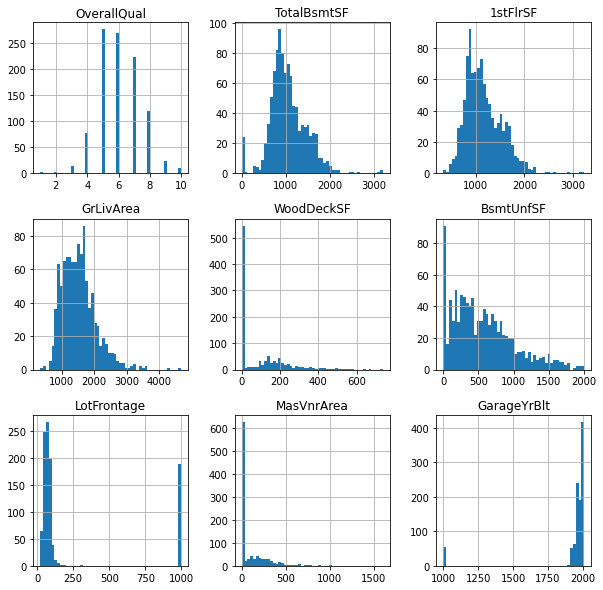

In [12]:
# exploremos las distribuciones de las variables luego de la sustitución
X_train.hist(bins=50, figsize=(10,10))
plt.show()

La variable LotFrontAge tiene una barra alta sobre el valor de 999 en el histograma, que aparece luego de la imputación. También se puede observar el efecto de la imputación en la variable GarageYrBlt, con la barra a la izquierda, sobre el valor 999.

**ADVERTENCIA**: recuerda ser cuidadoso con el orden de las columnas al reconstituir al array de numpy en un dataframe de pandas


### SimpleImputer: diferentes métodos en diferentes variables

En algunas ocasiones, queremos implementar diferentes técnicas de imputación para las diferentes variables. 
Cómo podemos hacer esto usando el SimpleImputer de Scikit-learn?

Tenemos que utilizar otra clase llamada ColumnTransformer. 

Más detalles sobre el ColumnTransformer en [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [14]:
# Separemos en segmentos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [16]:
# exploremos los valores nulos
X_train.isnull().mean().sort_values(ascending=False)

LotFrontage    0.184932
GarageYrBlt    0.052838
MasVnrArea     0.004892
BsmtUnfSF      0.000000
WoodDeckSF     0.000000
GrLivArea      0.000000
1stFlrSF       0.000000
TotalBsmtSF    0.000000
OverallQual    0.000000
dtype: float64

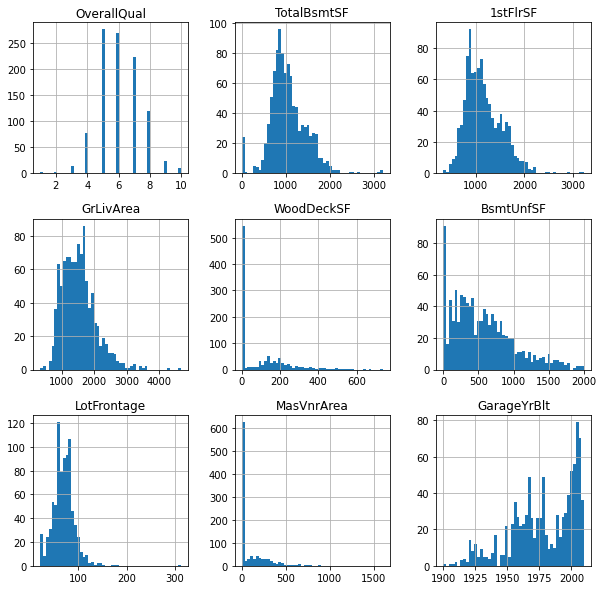

In [17]:
# Exploremos las distribuciones para decidir 
# cual valor arbitrario seleccionar por cada variable

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Para este demo, vamos a sustituir los valores nulos en LotFrontage, MasVnrArea y GarageYrBlt con diferentes valores arbitrarios

In [18]:
# primero vamos a crear una lista, indicando cuales son las 
# variables a sustituir 
features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

# luego vamos a instanciar imputers dentro de un pipeline
# creamos un imputer por cada variable
# indicando el valor arbitrario a sustituir
# ( este es diferente para cada variable)

imputer_LotFrontAge = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 999)),
])

imputer_MasVnrArea = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = -10)),
])

imputer_GarageYrBlt = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 1700)),
])

# luego ponemos las variables en una lista junto a los transformadores
# usando el ColumnTransformer

# en este ejemplo, usaremos los parámetros por defecto del ColumnTransformer
# remainder = drop, que significa que solo las variables sustituidas serán retenidas
# y el resto se descartan

preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', imputer_LotFrontAge, features_LotFrontAge),
    ('imputer_MasVnrArea', imputer_MasVnrArea, features_MasVnrArea),
    ('imputer_GarageYrBlt', imputer_GarageYrBlt, features_GarageYrBlt)
],remainder = 'drop')

In [19]:
# ajustemos el preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer_LotFrontAge',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=999,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 Pipeline(memory=...
         

In [20]:
# exploremos los diferentes transformers:

preprocessor.transformers

[('imputer_LotFrontAge', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=999,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('imputer_MasVnrArea', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=-10,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['MasVnrArea']),
 ('imputer_GarageYrBlt', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=1700,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['GarageYrBlt'])]

In [21]:
# exploremos los parámetros aprendidos:

# para LotFrontAge
preprocessor.named_transformers_['imputer_LotFrontAge'].named_steps['imputer'].statistics_

array([999.])

In [22]:
# para MasVnrArea

preprocessor.named_transformers_['imputer_MasVnrArea'].named_steps['imputer'].statistics_

array([-10.])

In [23]:
# para GarageYrBlt

preprocessor.named_transformers_['imputer_GarageYrBlt'].named_steps['imputer'].statistics_

array([1700.])

In [24]:
# ahora podemos sustituir los datos

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])

Observemos como los datos devueltos contienen solo 3 variables, las que usamos explícitamente para la sustitución de valores. Este es el efecto de fijar el parámetro remainder='drop' en el ColumnTransformer.

**OTRA ADVERTENCIA**

El ColumnTransformer simplemente selecciona una porción del dataframe que tiene las columnas requeridas para la sustitución. Luego el SimpleImputer opera en este sub-dataframe.
Si diferentes hacemos diferentes sustituciones en diferentes columnas, el ColumnTransformer genera dos dataframes con las columnas requeridas, aplica los imputadores, y luego concatena los dataframes para producir el resultado final.

En nuestro ejemplo, sucede lo siguiente:
- ColumnTransformer primero crea 3 dataframes, cada uno con una de las columnas a sustituir: LotFrontage, MasVnrArea y GarageBlt
- El SimpleImputers aprende los parámetros para cada uno de los dataframes seleccionados 
    - En este caso, ningún parámetro es aprendido, ya que hemos especificado el valor a utilizar en la imputación
- ColunmnTransformer concatena de vuelta todos los dataframes en el resultado final

En ese caso, no obtendremos todas las variables presentes originalmente en X_train, ya que fijamos el parametro remainder='drop' en el ColumnTransformer!! 

Existe el riesgo, de cambiar el orden de las variables si no usamos los transfomadores como parte de un pipeline. Por lo tanto debemos estar atentos del orden de las variables al reconstruir dataframes de los arrays de numpy.


In [25]:
# veamos como el resultado de la sustitución es un dataframe de tres columnas
pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


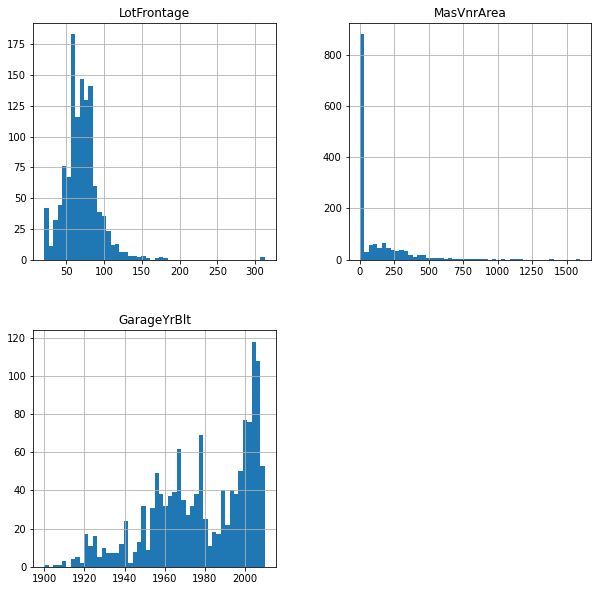

In [27]:
t = pd.DataFrame(data,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

t.hist(bins=50, figsize=(10,10))
plt.show()

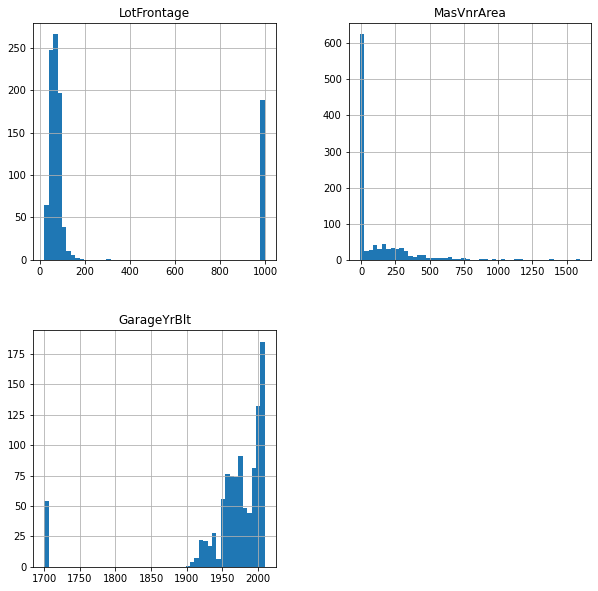

In [26]:
X_train = pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Nota las barras correspondientes a los valores arbitrarios 700, 999 y -1 por cada variable.